## 1. Énoncé du Problème (TP 1)
L'objectif est de résoudre le problème d'optimisation sous contrainte d'égalité suivant :
$$\min_{(x,y) \in K} f(x,y) = x^2 + y^2$$
Sous la contrainte :
$$K = \{(x,y) \in \mathbb{R}^2 \mid x + y = 1\}$$

## 2. Étude d'Existence et d'Unicité
### 2.1. Analyse de la fonction objectif
La fonction $f(x,y) = x^2 + y^2$ est une forme quadratique de matrice Hessienne :
$$\nabla^2 f(x,y) = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix}$$
Les valeurs propres sont $\lambda_1 = 2$ et $\lambda_2 = 2$. Comme elles sont strictement positives, la fonction est **fortement convexe**.
On a g est une fonction affine donc elle est convexe
Alors l'algorithme converge vers un minimum unique.

### 2.2. Solution par le Théorème de Lagrange
Le Lagrangien est défini par $\mathcal{L}(x, y, \lambda) = x^2 + y^2 + \lambda(x + y - 1)$. 
En annulant le gradient du Lagrangien ($\nabla \mathcal{L} = 0$), on obtient :
1. $2x + \lambda = 0 \implies x = -\lambda/2$
2. $2y + \lambda = 0 \implies y = -\lambda/2$
3. $x + y = 1 \implies -\lambda/2 - \lambda/2 = 1 \implies \lambda = -1$

D'où le point optimal unique : **$X^* = (0.5, 0.5)^T$**.

## 3. Opérateur de Projection $P_K$
La projection d'un point $X_0(x_0, y_0)$ sur la droite $x+y-1=0$ est le point de $K$ le plus proche de $X_0$. La formule est :
$$P_K(X_0) = X_0 - \frac{x_0 + y_0 - 1}{2} \begin{pmatrix} 1 \\ 1 \end{pmatrix}$$
Ce qui donne pour les composantes :
$$x_{proj} = \frac{x_0 - y_0 + 1}{2}, \quad y_{proj} = \frac{y_0 - x_0 + 1}{2}$$

## 4. Algorithme du Gradient Projeté
L'algorithme suit la récurrence :
$$X^{(n+1)} = P_K \left( X^{(n)} - \tau \nabla f(X^{(n)}) \right)$$

### Convergence et Choix du Pas $\tau$
Pour une fonction dont le gradient est $L$-Lipschitzien, la convergence est assurée si $0 < \tau < 2/L$. 
Ici, $\nabla f(X) = 2X$, donc $L=2$. Le pas doit être choisi dans l'intervalle :
$$0 < \tau < 1$$

--- EXERCICE 5 : FONCTION F ---


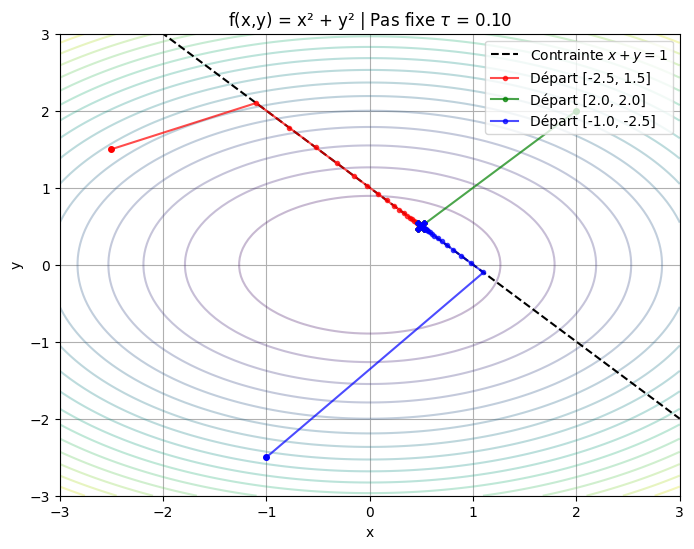

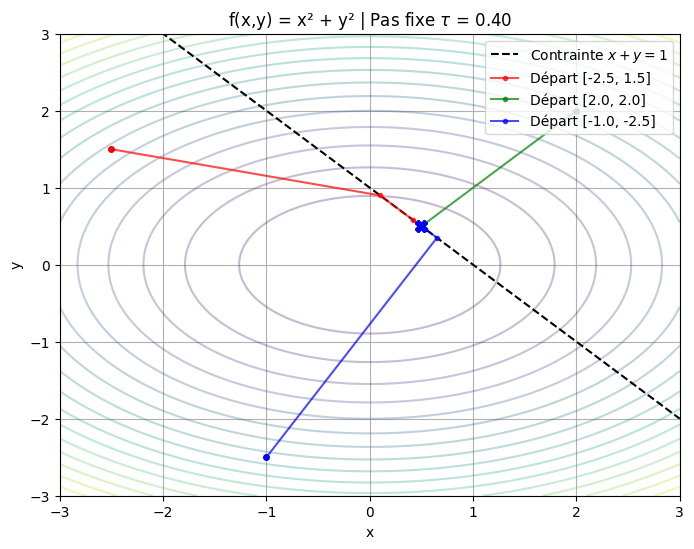

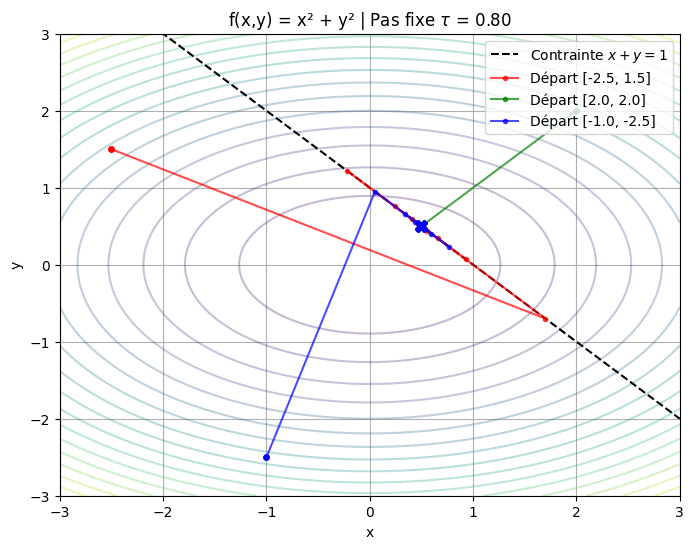

--- EXERCICE 6 : FONCTION H (BETA = 10) ---


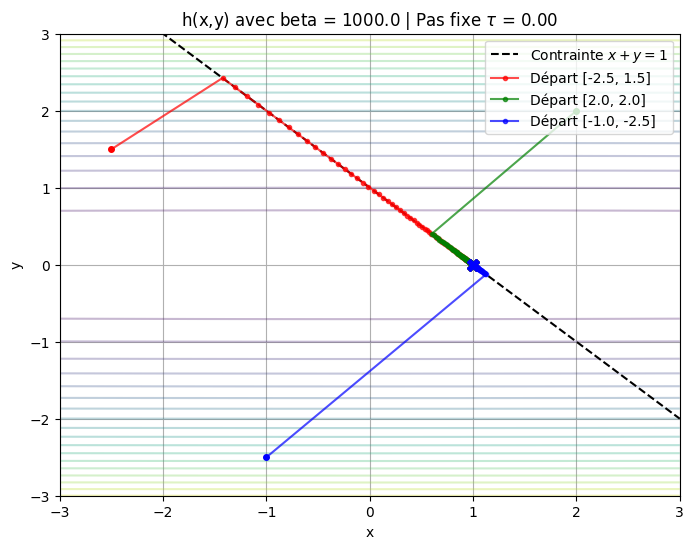

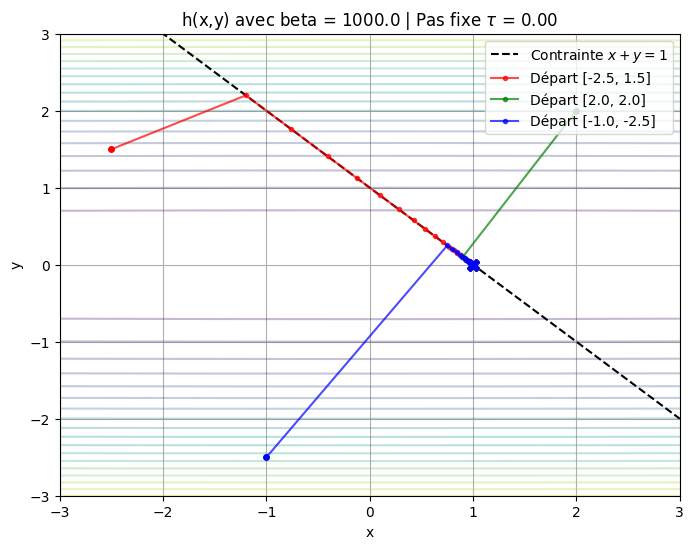

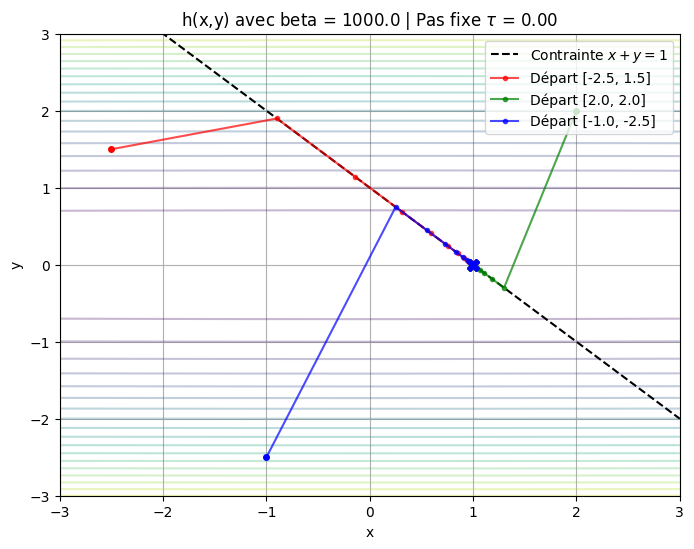

In [75]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# ====================================================
# I. MÉTHODE DU GRADIENT PROJETÉ (Question I & 5)
# ====================================================

def DGPFK(func, PK, X0, tau, Nmax, epsilon):
    gradient_f = grad(func)
    x = np.array(X0, dtype=float)
    history = [x.copy()]
    
    for k in range(Nmax):
        g = gradient_f(x)
        x_new = PK(x - tau * g)
        
        # Critère d'arrêt : Stagnation
        if np.linalg.norm(x_new - x) < epsilon:
            break
            
        x = x_new
        history.append(x.copy())
            
    return np.array(history)

# ====================================================
# II. DÉFINITION DU PROBLÈME
# ====================================================

def projection_K(X):
    """Projection orthogonale sur x + y = 1"""
    x0, y0 = X[0], X[1]
    return np.array([(x0 - y0 + 1)/2, (y0 - x0 + 1)/2])

# Paramètres d'étude
points_depart = [[-2.5, 1.5], [2.0, 2.0], [-1.0, -2.5]]
pas_a_tester = [0.1, 0.4, 0.8] 

def tracer_etude_separee(func_type='f', beta=1.0):
    if func_type == 'f':
        f = lambda X: X[0]**2 + X[1]**2
        base_title = "f(x,y) = x² + y²"
    else:
        f = lambda X: 0.5 * X[0]**2 + 0.5 * beta * X[1]**2
        base_title = f"h(x,y) avec beta = {beta}"
    
    # Maillage pour les courbes de niveau
    x_vals = np.linspace(-3, 3, 100)
    y_vals = np.linspace(-3, 3, 100)
    X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
    # Calcul de Z pour l'affichage (f ou h)
    Z = 0.5 * X_grid**2 + 0.5 * (beta if func_type=='h' else 2.0) * Y_grid**2

    # --- Une figure par valeur de TAU ---
    for tau in pas_a_tester:
        plt.figure(figsize=(8, 6))
        
        # Tracer le fond (niveaux et contrainte)
        plt.contour(X_grid, Y_grid, Z, levels=20, cmap='viridis', alpha=0.3)
        plt.plot(x_vals, 1 - x_vals, 'k--', label="Contrainte $x+y=1$")
        
        actual_tau = tau / (beta if func_type == 'h' else 1.0)
        
        # Tracer les trajectoires pour chaque point de départ
        colors = ['red', 'green', 'blue']
        for i, x0 in enumerate(points_depart):
            traj = DGPFK(f, projection_K, x0, tau=actual_tau, Nmax=1000, epsilon=1e-4)
            
            plt.plot(traj[:, 0], traj[:, 1], '.-', color=colors[i], 
                     label=f"Départ {x0}", alpha=0.7)
            plt.plot(traj[0, 0], traj[0, 1], 'o', color=colors[i], markersize=4) # Init
            plt.plot(traj[-1, 0], traj[-1, 1], 'X', color=colors[i], markersize=8) # Final

        plt.title(f"{base_title} | Pas fixe $\\tau$ = {actual_tau:.2f}")
        plt.xlabel("x") ; plt.ylabel("y")
        plt.xlim(-3, 3) ; plt.ylim(-3, 3)
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.show()

# ====================================================
# III. EXÉCUTION
# ====================================================

print("--- EXERCICE 5 : FONCTION F ---")
tracer_etude_separee(func_type='f')

print("--- EXERCICE 6 : FONCTION H (BETA = 10) ---")
tracer_etude_separee(func_type='h', beta=1000.0)

## 5. Interprétation des Résultats Numériques
### 5.1. Critères d'arrêt
* **Critère 1 :** $\|X^{(n+1)} - X^{(n)}\| < \epsilon$ (Mesure la stagnation de la solution).
* **Critère 2 :** $\|\nabla f_{proj}(X^{(n)})\| < \epsilon$ (Mesure la proximité avec les conditions de KKT).

### 5.2. Influence de $\beta$ (Question 6)
Si on remplace $f$ par $h(x,y) = \frac{1}{2}x^2 + \frac{1}{2}\beta y^2$ :
* Les lignes de niveau deviennent des **ellipses**.
* Le **conditionnement** du problème est égal à $\beta$. Plus $\beta$ est grand, plus les lignes de niveau sont étirées, ce qui force l'algorithme à faire des "zig-zags".
* La convergence devient beaucoup plus lente et nécessite un pas $\tau$ plus petit : $\tau < 2/\beta$.

## Synthèse des Résultats : Gradient Projeté

### 1. Comportement Géométrique
L'algorithme du gradient projeté se décompose en deux mouvements :
* **La descente :** Un pas de gradient classique qui tire le point vers le minimum global (l'origine $(0,0)$).
* **La projection :** L'opérateur $P_K$ ramène immédiatement le point sur la droite $x+y=1$ dès qu'il en sort.
Le point finit par "glisser" le long de la contrainte jusqu'à l'optimum théorique $X^* = (0.5, 0.5)$.

### 2. Influence du pas $\tau$
* **$\tau$ trop petit :** La convergence est garantie mais extrêmement lente (beaucoup d'itérations).
* **$\tau$ optimal :** Permet d'atteindre l'optimum en un nombre minimal de pas.
* **$\tau$ trop grand ($\tau > 1$) :** L'algorithme devient instable et diverge, car il dépasse la limite imposée par la constante de Lipschitz ($L=2$ pour $f$).

### 3. Impact du conditionnement ($\beta$)
Pour la fonction $h(x,y)$, le paramètre $\beta$ étire les lignes de niveau. 
* Plus $\beta$ est grand, plus le gradient est "raide" dans une direction, provoquant des **oscillations en zig-zag**.
* Le pas maximal autorisé diminue ($\tau < 2/\beta$), rendant la résolution de problèmes mal conditionnés beaucoup plus coûteuse en calcul.

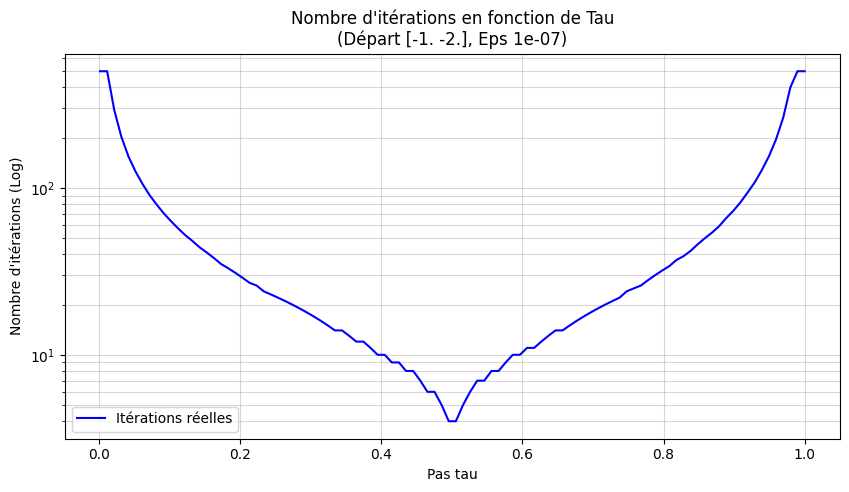

In [68]:
# --- Fonction de test de performance ---
def tracer_performance_tau():
    f = lambda X: X[0]**2 + X[1]**2
    X0 = np.array([-1.0, -2.0]) # Point de départ éloigné
    EPS = 1e-7                 # Précision très fine
    
    # On teste des petits taus car c'est là que le nombre d'itérations varie
    taus = np.linspace(0.001, 1, 100) 
    nb_iters = []

    for t in taus:
        h = DGPFK(f, projection_K, X0, t, Nmax=500, epsilon=EPS)
        nb_iters.append(len(h) - 1)

    plt.figure(figsize=(10, 5))
    plt.plot(taus, nb_iters, color='blue', label="Itérations réelles")
    plt.yscale('log') # Logarithmique car pour tau=0.001, iters est très grand
    plt.title(f"Nombre d'itérations en fonction de Tau\n(Départ {X0}, Eps {EPS})")
    plt.xlabel("Pas tau")
    plt.ylabel("Nombre d'itérations (Log)")
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.legend()
    plt.show()

tracer_performance_tau()

# I. Analyse de la Méthode de Pénalisation

## 1. Principe Mathématique

On considère le problème :

$$ \min_{X \in K} f(X) $$

avec :

$$ K = \{ X = (x,y) \in \mathbb{R}^2 \mid x + y - 1 = 0 \} $$

On introduit une fonction de pénalisation extérieure $N(X)$ telle que :

$$
N(X) =
\begin{cases}
0 & \text{si } X \in K \\
>0 & \text{sinon}
\end{cases}
$$

Pour une contrainte d'égalité $g(X)=0$, on utilise généralement :

$$ N(X) = \frac{1}{2} (g(X))^2 $$

avec :

$$ g(X) = x + y - 1 $$

Donc :

$$ N(X) = \frac{1}{2} (x + y - 1)^2 $$

Pour $\mu > 0$, on résout une suite de problèmes non contraints :

$$ \min_{X \in \mathbb{R}^2} f_\mu(X) $$

où :

$$ f_\mu(X) = f(X) + \mu N(X) $$

Dans l'exemple :

$$ f(X) = x^2 + y^2 $$

Donc finalement :

$$ f_\mu(X) = x^2 + y^2 + \mu \, \frac{1}{2}(x + y - 1)^2 $$

---

## 2. Convergence Théorique

- Quand $\mu \to +\infty$, la solution $X_\mu$ converge vers $ X^*$ (solution du problème contraint).

- **Avantage :** pas besoin d'opérateur de projection $P_K$.

- **Inconvénient :** plus $\mu$ est grand, plus $f_\mu$ est mal conditionnée → nécessite un pas $\tau$ très petit.

---

# II. Implémentation Python 


<>:37: SyntaxWarning: invalid escape sequence '\m'
<>:37: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_3936\3873631018.py:37: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(hist[:,0], hist[:,1], 'r.-', label=f"Trajectoire $\mu={mu_val}$")


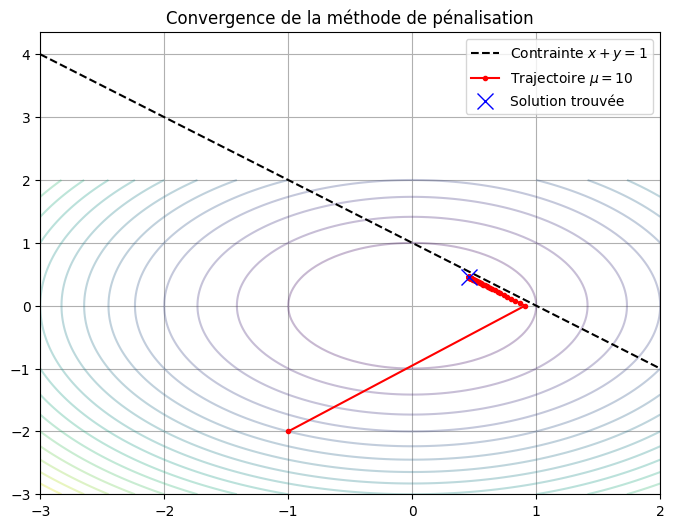

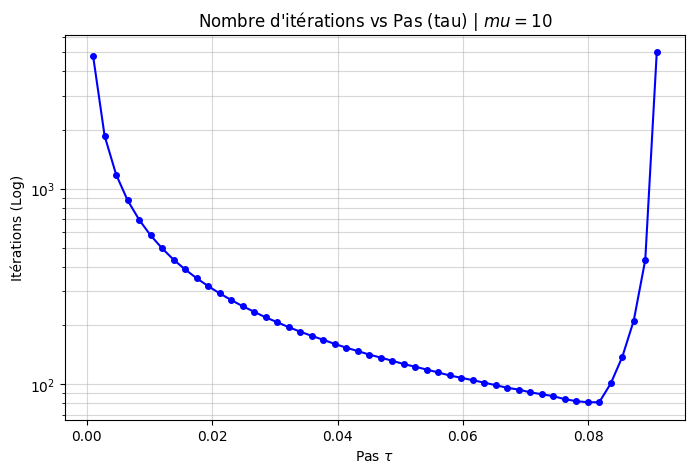

0.09090909090909091


In [69]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# --- Fonctions de base ---
def f_test(X): return X[0]**2 + X[1]**2
def g_test(X): return X[0] + X[1] - 1.0
def N_ext(X):  return 0.5 * (g_test(X))**2

# --- Fonction PENALISATION (Format Énoncé) ---
def PENALISATION(f, g, X0, tau, Nmax, N, mu, epsilon):
    f_total = lambda X: f(X) + mu * N(X)
    gradient_f_total = grad(f_total)
    x = np.array(X0, dtype=float)
    history = [x.copy()]
    for k in range(Nmax):
        g_val = gradient_f_total(x)
        x_new = x - tau * g_val
        if np.linalg.norm(x_new - x) < epsilon:
            break
        x = x_new
        history.append(x.copy())
    return x, np.array(history)

# ====================================================
# 1. VISUALISATION DE LA SOLUTION ET TRAJECTOIRE
# ====================================================
def tracer_trajectoire_penalisee(mu_val=10):
    X0 = np.array([-1.0, -2.0])
    tau = 1.0 / (2 + 2*mu_val) # Pas sécurisé
    sol, hist = PENALISATION(f_test, g_test, X0, tau, 2000, N_ext, mu_val, 1e-7)

    plt.figure(figsize=(8, 6))
    x_v, y_v = np.meshgrid(np.linspace(-3, 2, 100), np.linspace(-3, 2, 100))
    plt.contour(x_v, y_v, x_v**2 + y_v**2, levels=20, alpha=0.3)
    plt.plot(np.linspace(-3, 2, 100), 1-np.linspace(-3, 2, 100), 'k--', label="Contrainte $x+y=1$")
    plt.plot(hist[:,0], hist[:,1], 'r.-', label=f"Trajectoire $\mu={mu_val}$")
    plt.plot(sol[0], sol[1], 'bx', markersize=12, label="Solution trouvée")
    plt.title("Convergence de la méthode de pénalisation")
    plt.legend() ; plt.grid(True)
    plt.show()

# ====================================================
# 2. ANALYSE DU NOMBRE D'ITÉRATIONS EN FONCTION DE TAU
# ====================================================
def etude_tau_penalisation(mu_val=10):
    X0 = np.array([-1.0, -2.0])
    # La limite théorique pour tau est 2/(2 + 2*mu)
    tau_max = 2.0 / (2 + 2*mu_val)
    taus = np.linspace(0.001, tau_max, 50)
    iters = []

    for t in taus:
        _, hist = PENALISATION(f_test, g_test, X0, t, 5000, N_ext, mu_val, 1e-7)
        iters.append(len(hist) - 1)

    plt.figure(figsize=(8, 5))
    plt.plot(taus, iters, 'bo-', markersize=4)
    plt.yscale('log')
    plt.title(f"Nombre d'itérations vs Pas (tau) | $mu = {mu_val}$")
    plt.xlabel("Pas $\\tau$")
    plt.ylabel("Itérations (Log)")
    plt.grid(True, which="both", ls="-", alpha=0.5)
    plt.show()
    print(tau_max)
# --- Exécution ---
tracer_trajectoire_penalisee(mu_val=10)
etude_tau_penalisation(mu_val=10)


# TP3 Méthode d’Uzawa (Méthode des multiplicateurs de Lagrange)

## 1. Problème
Minimiser $f(x,y)=x^2+y^2$ sous $g(x,y)=x+y-1=0$. <br>


## Méthode d'Uzawa (cas contrainte d'égalité)

On considère le problème :

$$
\min_{x \in \mathbb{R}^d} f(x) \quad \text{sous} \quad g(x)=0
$$

On définit le Lagrangien :

$$
L(x,\lambda)=f(x)+\lambda g(x)
$$

L'algorithme d'Uzawa s'écrit :

$$
\begin{cases}
x^{(n)} = \arg\min_x L(x,\lambda^{(n)}) \\
\lambda^{(n+1)} = \lambda^{(n)} + \tau\, g(x^{(n)})
\end{cases}
$$

où $\tau>0$ est un pas fixe.


# I. Analyse Mathématique de la Méthode d'Uzawa

## 1. Le Lagrangien et le Point-Selle

On considère le problème de minimisation sous contrainte :

$$ f(x,y) = x^2 + y^2 $$

avec la contrainte :

$$ g(x,y) = x + y - 1 = 0 $$

Le Lagrangien associé est :

$$ L(x,y,\lambda) = x^2 + y^2 + \lambda (x + y - 1) $$

Le système d'optimalité (conditions KKT) s'écrit :

- $$ \nabla_x L = 2x^* + \lambda^* = 0 \quad \Rightarrow \quad x^* = - \frac{\lambda^*}{2} $$
- $$ \nabla_y L = 2y^* + \lambda^* = 0 \quad \Rightarrow \quad y^* = - \frac{\lambda^*}{2} $$
- $$ \nabla_\lambda L = x^* + y^* - 1 = 0 $$

En substituant :

$$ -\frac{\lambda^*}{2} - \frac{\lambda^*}{2} = 1 \quad \Rightarrow \quad \lambda^* = -1 $$

d'où la solution optimale :

$$ X^* = (x^*, y^*) = (0.5,\, 0.5) $$

---

## 2. Algorithme Itératif d'Uzawa

L'algorithme réalise une descente sur la partie primale et une montée sur le dual.

**Étape primale :**

$$
X^{k+1} = X^k - \tau \, \nabla_X L(X^k, \lambda^k)
$$

i.e.

$$
X^{k+1} =
\begin{pmatrix}
x^{k+1} \\
y^{k+1}
\end{pmatrix}
=
\begin{pmatrix}
x^k \\
y^k
\end{pmatrix}
-
\tau
\begin{pmatrix}
2x^k + \lambda^k \\
2y^k + \lambda^k
\end{pmatrix}
$$

**Étape duale :**

$$ \lambda^{k+1} = \lambda^k + \rho \, g(X^{k+1}) = \lambda^k + \rho (x^{k+1} + y^{k+1} - 1) $$

---

# II. Calcul Théorique des Bornes sur $\tau$

Pour assurer la convergence de l'étape primale, il faut respecter une condition sur le pas $\tau$.

## 1. Borne de Stabilité

La Hessienne de $f$ vaut :

$$ H = \begin{pmatrix} 2 & 0 \\ 0 & 2 \end{pmatrix} $$

Les valeurs propres sont :

$$ \lambda_{\min} = 2, \quad \lambda_{\max} = 2 $$

Pour un gradient à pas fixe :

$$ 0 < \tau < \frac{2}{\lambda_{\max}} = 1 $$

## 2. Valeur Optimale de $\tau$

Pour une fonction quadratique, le pas optimal est :

$$ \tau_{\mathrm{opt}} = \frac{2}{\lambda_{\min} + \lambda_{\max}} = \frac{2}{2+2} = 0.5 $$

---

# III. Confrontation avec les Résultats Numériques

Sur la courbe "Itérations vs $\tau$", on observe :

- **Zone lente quand $\tau \to 0$** : le gradient est trop amorti $\Rightarrow$ convergence longue.
- **Minimum autour de $\tau \approx 0.5$** : correspond au $\tau_{\mathrm{opt}}$ théorique.
- **Zone instable quand $\tau \to 0.9$** : proche de la borne $\tau = 1$, l'algorithme oscille et ralentit fortement.


## 2. Algorithme d’Uzawa
Cas contrainte égalité.

In [43]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# --- Fonctions du problème ---
def f_test(X): return X[0]**2 + X[1]**2
def g_test(X): return X[0] + X[1] - 1.0

def UZAWA(f, g, X0, lambda0, tau, rho, Nmax, epsilon):
    """
    Algorithme d'Uzawa pour l'optimisation sous contrainte d'égalité.
    tau : pas de descente pour le problème primal (X)
    rho : pas de montée pour le problème dual (lambda)
    """
    x = np.array(X0, dtype=float)
    lmbda = float(lambda0)
    history = [x.copy()]
    
    for k in range(Nmax):
        # 1. Mise à jour de X : Descente de gradient sur le Lagrangien L(x, lambda)
        # Grad_x L = Grad f(x) + lambda * Grad g(x)
        gradient_L = grad(lambda X: f(X) + lmbda * g(X))
        x_new = x - tau * gradient_L(x)
        
        # 2. Mise à jour de lambda : Montée de gradient dual
        lmbda_new = lmbda + rho * g(x_new)
        
        # Critère de convergence
        if np.linalg.norm(x_new - x) < epsilon:
            break
            
        x = x_new
        lmbda = lmbda_new
        history.append(x.copy())
        
    return x, np.array(history)

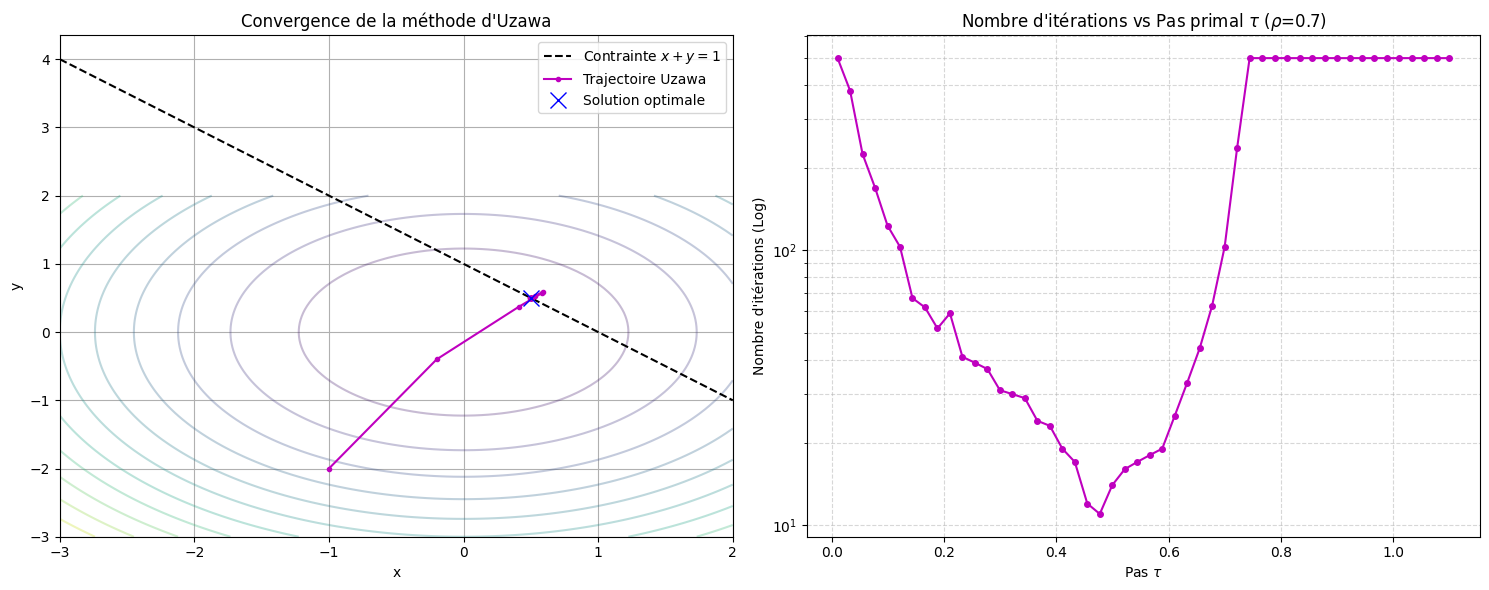

In [73]:
def tracer_uzawa_complet():
    X0 = np.array([-1.0, -2.0])
    rho_fixe = 0.7
    eps = 1e-7

    plt.figure(figsize=(15, 6))

    # --- GRAPH 1 : Trajectoire vers l'optimum ---
    plt.subplot(1, 2, 1)
    sol, hist = UZAWA(f_test, g_test, X0, 0, 0.4, rho_fixe, 500, eps)
    
    x_v, y_v = np.meshgrid(np.linspace(-3, 2, 100), np.linspace(-3, 2, 100))
    plt.contour(x_v, y_v, x_v**2 + y_v**2, levels=15, alpha=0.3)
    plt.plot(np.linspace(-3, 2, 100), 1-np.linspace(-3, 2, 100), 'k--', label="Contrainte $x+y=1$")
    plt.plot(hist[:,0], hist[:,1], 'm.-', label="Trajectoire Uzawa")
    plt.plot(sol[0], sol[1], 'bx', markersize=12, label="Solution optimale")
    plt.title("Convergence de la méthode d'Uzawa")
    plt.xlabel("x") ; plt.ylabel("y")
    plt.legend() ; plt.grid(True)

    # --- GRAPH 2 : Itérations en fonction de Tau ---
    plt.subplot(1, 2, 2)
    taus = np.linspace(0.01, 1.1, 50)
    iters = []
    for t in taus:
        _, h = UZAWA(f_test, g_test, X0, 0, t, rho_fixe, 500, eps)
        iters.append(len(h)-1)
    
    plt.plot(taus, iters, 'mo-', markersize=4)
    plt.yscale('log')
    plt.title(f"Nombre d'itérations vs Pas primal $\\tau$ ($\\rho$={rho_fixe})")
    plt.xlabel("Pas $\\tau$") ; plt.ylabel("Nombre d'itérations (Log)")
    plt.grid(True, which="both", ls="--", alpha=0.5)

    plt.tight_layout()
    plt.show()

tracer_uzawa_complet()

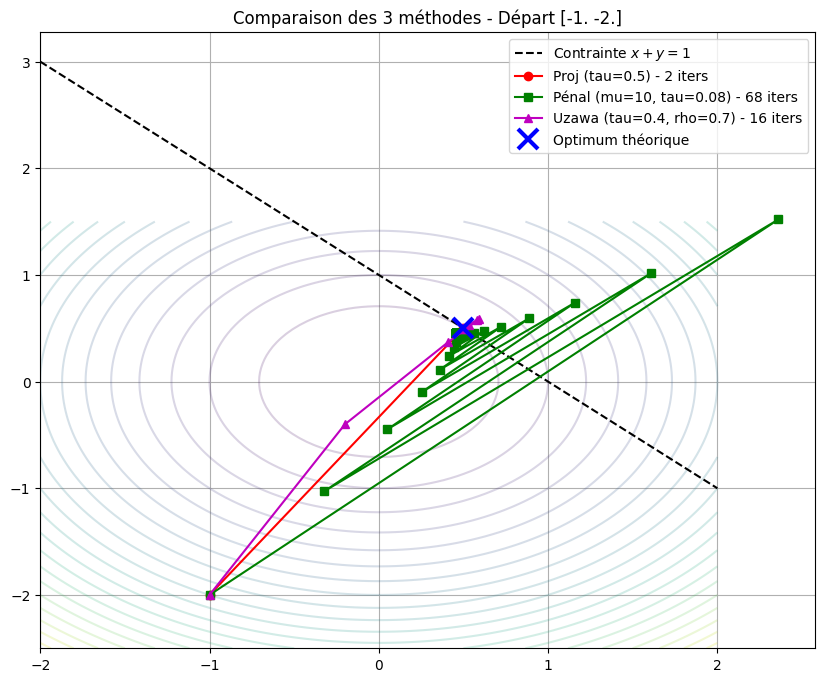

In [64]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

# --- Fonctions du problème ---
def f_test(X): return X[0]**2 + X[1]**2
def g_test(X): return X[0] + X[1] - 1.0
def N_ext(X):  return 0.5 * (g_test(X))**2
def projection_K(X): return np.array([(X[0] - X[1] + 1)/2, (X[1] - X[0] + 1)/2])

# --- Implémentations ---
def run_gradient_projete(X0, tau, Nmax, eps):
    x = np.array(X0, dtype=float)
    hist = [x.copy()]
    for _ in range(Nmax):
        x_new = projection_K(x - tau * grad(f_test)(x))
        if np.linalg.norm(x_new - x) < eps: break
        x = x_new
        hist.append(x.copy())
    return np.array(hist)

def run_penalisation(X0, tau, mu, Nmax, eps):
    f_p = lambda X: f_test(X) + mu * N_ext(X)
    x = np.array(X0, dtype=float)
    hist = [x.copy()]
    for _ in range(Nmax):
        x_new = x - tau * grad(f_p)(x)
        if np.linalg.norm(x_new - x) < eps: break
        x = x_new
        hist.append(x.copy())
    return np.array(hist)

def run_uzawa(X0, tau, rho, Nmax, eps):
    x = np.array(X0, dtype=float)
    lmb = 0.0
    hist = [x.copy()]
    for _ in range(Nmax):
        grad_L = grad(lambda X: f_test(X) + lmb * g_test(X))
        x_new = x - tau * grad_L(x)
        lmb = lmb + rho * g_test(x_new)
        if np.linalg.norm(x_new - x) < eps: break
        x = x_new
        hist.append(x.copy())
    return np.array(hist)

# --- Affichage ---
X0 = np.array([-1.0, -2.0])
h_proj = run_gradient_projete(X0, 0.5, 500, 1e-6)
h_pena = run_penalisation(X0, 0.08, 10, 500, 1e-6)
h_uzaw = run_uzawa(X0, 0.4, 0.7, 500, 1e-6)

plt.figure(figsize=(10, 8))
x_v, y_v = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2.5, 1.5, 100))
plt.contour(x_v, y_v, x_v**2 + y_v**2, levels=20, alpha=0.2)
plt.plot(np.linspace(-2, 2, 100), 1-np.linspace(-2, 2, 100), 'k--', label="Contrainte $x+y=1$")

plt.plot(h_proj[:,0], h_proj[:,1], 'r-o', label=f"Proj (tau=0.5) - {len(h_proj)} iters")
plt.plot(h_pena[:,0], h_pena[:,1], 'g-s', label=f"Pénal (mu=10, tau=0.08) - {len(h_pena)} iters")
plt.plot(h_uzaw[:,0], h_uzaw[:,1], 'm-^', label=f"Uzawa (tau=0.4, rho=0.7) - {len(h_uzaw)} iters")

plt.plot(0.5, 0.5, 'bx', markersize=15, markeredgewidth=3, label="Optimum théorique")
plt.title(f"Comparaison des 3 méthodes - Départ {X0}")
plt.legend()
plt.grid(True)
plt.show()

# Tableau Comparatif des Méthodes

| Critère | Gradient Projeté | Pénalisation | Uzawa |
|---|---|---|---|
| **Pas $\tau$ optimal** | $0.5$ (maximal) | $\approx 0.08$ (très réduit) | $\approx 0.4$ (intermédiaire) |
| **Bornes sur $\tau$** | $0 < \tau < 1.0$ | $0 < \tau < \dfrac{2}{2+\mu}$ (0.09) | $0 < \tau < 1.0$ (couplé à $\rho$) |
| **Solution $X^*$** | Exacte $(0.5,\,0.5)$ | Approchée (biais en $1/\mu$) | Exacte $(0.5,\,0.5)$ |
| **Trajectoire** | Directe vers $K$ puis $X^*$ | Courbe “aspirée” par la droite | Spirale/courbe vers le point-selle |
| **Efficacité** | Maximale | Faible (mauvais conditionnement) | Bonne (si $\rho$ bien réglé) |


# 1. Inconvénient majeur du Gradient Projeté

Bien que le gradient projeté soit très efficace (convergence rapide, respect strict de la contrainte), il possède une limite pratique importante :

> **Coût de la projection \(P_K\)**

- Pour des ensembles de contraintes simples (droite, boule, boîte), la projection est immédiate.
- Si \(K\) est défini par des contraintes non linéaires complexes, ou par intersections d'ensembles, alors calculer $(P_K(X))$ devient **un problème d'optimisation secondaire** à résoudre à chaque itération.

---

### Pourquoi Uzawa ?

La méthode d'Uzawa contourne ce problème en incorporant la contrainte via le **multiplicateur de Lagrange \(\lambda\)**, sans calculer de projection géométrique.

On remplace une opération coûteuse :

> **projection géométrique sur \(K\)**

par une mise à jour duale simple :

$\lambda^{k+1} = \lambda^k + \rho\, g(X^k)$

---

# 2. Avantages de la Méthode de Pénalisation

Malgré son **mauvais conditionnement numérique**, la méthode de pénalisation présente plusieurs atouts :

---

### ✔ Simplicité d'implémentation

Transforme un problème **contraint** en problème **non contraint** :

$
f_\mu(X) = f(X) + \mu N(X)
$

Ce qui permet d'utiliser directement :

- Gradient
- Newton
- Quasi-Newton (BFGS, L-BFGS)
- Adam (en ML)
- etc.

---

### ✔ Flexibilité

Pas d'exigence particulière sur :

- convexité stricte
- structure duale
- géométrie de \(K\)

---

### ✔ Régularisation

L'ajout du terme \(\mu N(X)\) agit comme une **énergie supplémentaire**, utile pour stabiliser certains problèmes.

---

# 3. Quand Utiliser la Pénalisation ?

La pénalisation est particulièrement pertinente dans les cas suivants :

###  **Pré-optimisation**

Pour obtenir rapidement une solution **approchée**, ensuite raffinée par une méthode plus précise (Uzawa, KKT, Newton augmenté).

###  **Contraintes souples (Soft Constraints)**

Lorsque la contrainte n’a pas besoin d'être satisfaite strictement :

- traitement d'image
- apprentissage automatique
- modélisation floue

###  **Prototypage rapide**

Idéal pour valider un modèle avant d'investir dans un solveur contraint plus complexe.

---

# Tableau de Synthèse

| Méthode | Difficulté majeure | Quand la choisir ? |
|---|---|---|
| **Gradient Projeté** | Calcul de $P_K$ parfois impossible | Contraintes simples (boîtes, sphères, droites) |
| **Pénalisation** | Mauvais conditionnement $\tau$ | Rapidité de code ou contraintes souples |
| **Uzawa** | Réglage délicat du couple $(\tau,\rho)$ | Contraintes complexes nécessitant précision exacte |
